In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import roc_curve,roc_auc_score

rcParams['figure.figsize']=14,8
RANDOM_SEED=42

#LABELS=["NORMAL","Fraud"]
sns.set(style='darkgrid')


In [2]:
df=pd.read_csv('/home/anu/Downloads/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
target='Class'

In [5]:
x=df.loc[:,df.columns!=target]
y=df.loc[:,df.columns==target]
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


0    284315
1       492
Name: Class, dtype: int64


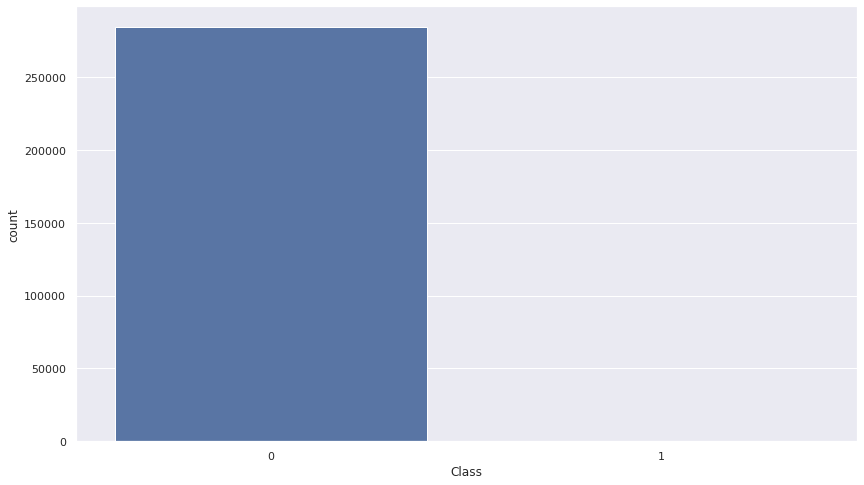

In [6]:
ax=sns.countplot(x=target,data=df)
print(df[target].value_counts())

In [7]:
#Huge difference in 0 & 1

In [8]:
100*(492/float(df.shape[0]))

0.1727485630620034

In [9]:
100*(284315/float(df.shape[0]))

99.82725143693798

In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33,random_state=42)

In [11]:
#show accuracy,precision, recall,and f1 score
#create a function

In [12]:
ytrain[target].value_counts()

#in training dataset, 190477 0s and 343 1s

0    190477
1       343
Name: Class, dtype: int64

In [13]:
ytest[target].value_counts()

#in testing dataset, 93838 0s and 149 1s

0    93838
1      149
Name: Class, dtype: int64

In [14]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression().fit(xtrain,ytrain)
ytestpred=clf.predict(xtest)

import warnings
warnings.filterwarnings('ignore')


In [15]:
def generate_model_report(y_actual,y_predicted):
    print('Accuracy=',accuracy_score(y_actual,y_predicted))
    print('precision=',precision_score(y_actual,y_predicted))
    print('Recall=',recall_score(y_actual,y_predicted))
    print('F1 score=',f1_score(y_actual,y_predicted))
    pass

In [16]:
#To take the aucroc curve, it need to take probability,so

def generate_auc_roc_curve(clf,x_test):
    y_pred_proba=clf.predict_proba(x_test)[:,1]
    fpr,tpr,threshold=roc_curve(ytest,y_pred_proba)
    auc=roc_auc_score(ytest,y_pred_proba)
    plt.plot(fpr,tpr,label="Auc Roc curve with area under the curve="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

In [17]:
generate_model_report(ytest,ytestpred)

Accuracy= 0.9989785821443391
precision= 0.7154471544715447
Recall= 0.5906040268456376
F1 score= 0.6470588235294118


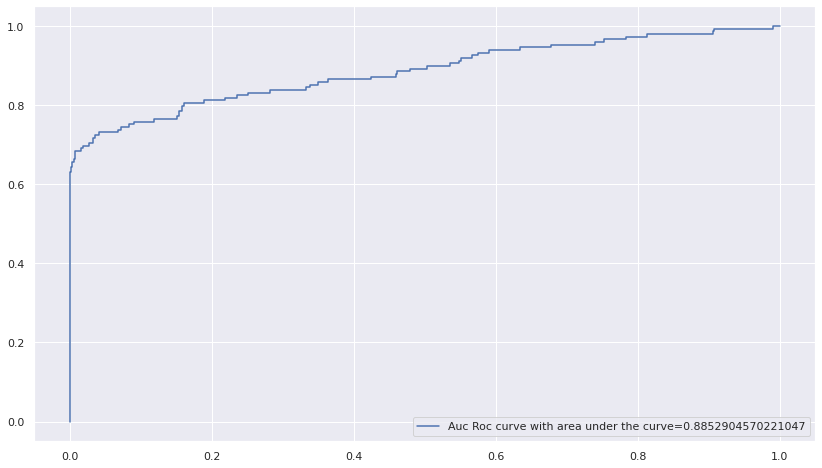

In [18]:
generate_auc_roc_curve(clf,xtest)
#auc 

# ****Taking length of minority sample(ie,492)using that length, it takes random samples from the majority sample*******************


In [19]:

minority_class_len=len(df[df[target]==1])
print(minority_class_len)#length

492


# then randomly taking the indices of majority class of 284315


In [20]:

majority_class_indices=df[df[target]==0].index
print(majority_class_indices)

#ie, taking 492 data randomly from 284315 (majority set)

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            284797, 284798, 284799, 284800, 284801, 284802, 284803, 284804,
            284805, 284806],
           dtype='int64', length=284315)


In [21]:
random_majority_indices=np.random.choice(majority_class_indices,
                                        minority_class_len,
                                        replace=False)
print(len(random_majority_indices))

492


In [22]:
#Taking index of minority class

minority_class_indices=df[df[target]==1].index
print(minority_class_indices)

Int64Index([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
              6338,   6427,
            ...
            274382, 274475, 275992, 276071, 276864, 279863, 280143, 280149,
            281144, 281674],
           dtype='int64', length=492)


In [23]:
under_sample_indices=np.concatenate([minority_class_indices,
                                    random_majority_indices])

In [24]:
under_sample=df.loc[under_sample_indices]

<AxesSubplot:xlabel='Class', ylabel='count'>

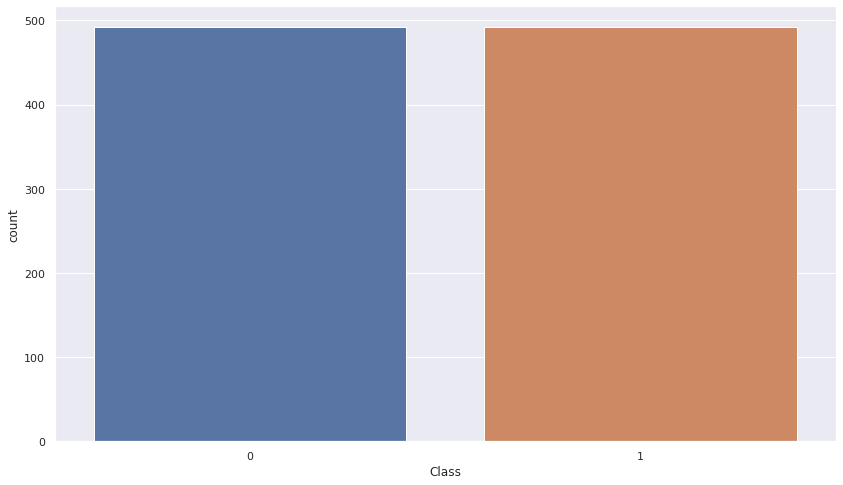

In [25]:
sns.countplot(x=target,data=under_sample)

#with the help of concatenate which result into a df and using its location(indices),we get data

#majority class and minority now become equal

In [26]:
X=under_sample.loc[:,df.columns!=target]
Y=under_sample.loc[:,df.columns==target]
#now taking x,and y accordingly from under_sample data

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=42)
clf=LogisticRegression().fit(x_train,y_train)
y_test_pred=clf.predict(x_test)

In [27]:
X.shape
#just checking new data is in array or not

(984, 30)

In [28]:
Y.shape

(984, 1)

In [29]:
y_test.shape

(325, 1)

In [30]:
y_train.shape

(659, 1)

In [31]:
generate_model_report(y_test,y_test_pred)

Accuracy= 0.9292307692307692
precision= 0.9607843137254902
Recall= 0.8963414634146342
F1 score= 0.9274447949526814


In [33]:
generate_auc_roc_curve(clf,x_test)

ValueError: Found input variables with inconsistent numbers of samples: [93987, 325]